In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def pol(a0,a1,N):
    y = []
    x = []
    for i in range(0,N):
        x.append(np.array([1, np.random.uniform(-1, 1)]))
        y.append(a0+a1*x[i][1]+np.random.normal(0,0.2))
    return x,y




a0 = -0.3
a1 =  0.5
N  = 20
x,y  = pol(a0,a1,N)
beta = 25
alpha = 2

prior_mean = [0, 0]
prior_cov = 1/alpha * np.eye(2)
mean_c = prior_mean
cov_c = prior_cov


In [9]:

def learn(xx, yy,cov_inv_ant,mean_ant):
    
    cov_inv = cov_inv_ant + beta * np.outer(xx, xx)
    
    cov = np.linalg.inv(cov_inv)
   
    mean = cov @ (cov_inv_ant @ mean_ant + beta * yy * xx)
    
    return cov_inv, mean


def predict(x,cov_inv,mean,w_cov):

       
        y_pred_mean = x @ mean

        w_cov = np.linalg.inv(cov_inv)
        y_pred_var = 1 / beta + x @ w_cov @ x.T

        return stats.norm(loc=y_pred_mean, scale=y_pred_var ** .5)

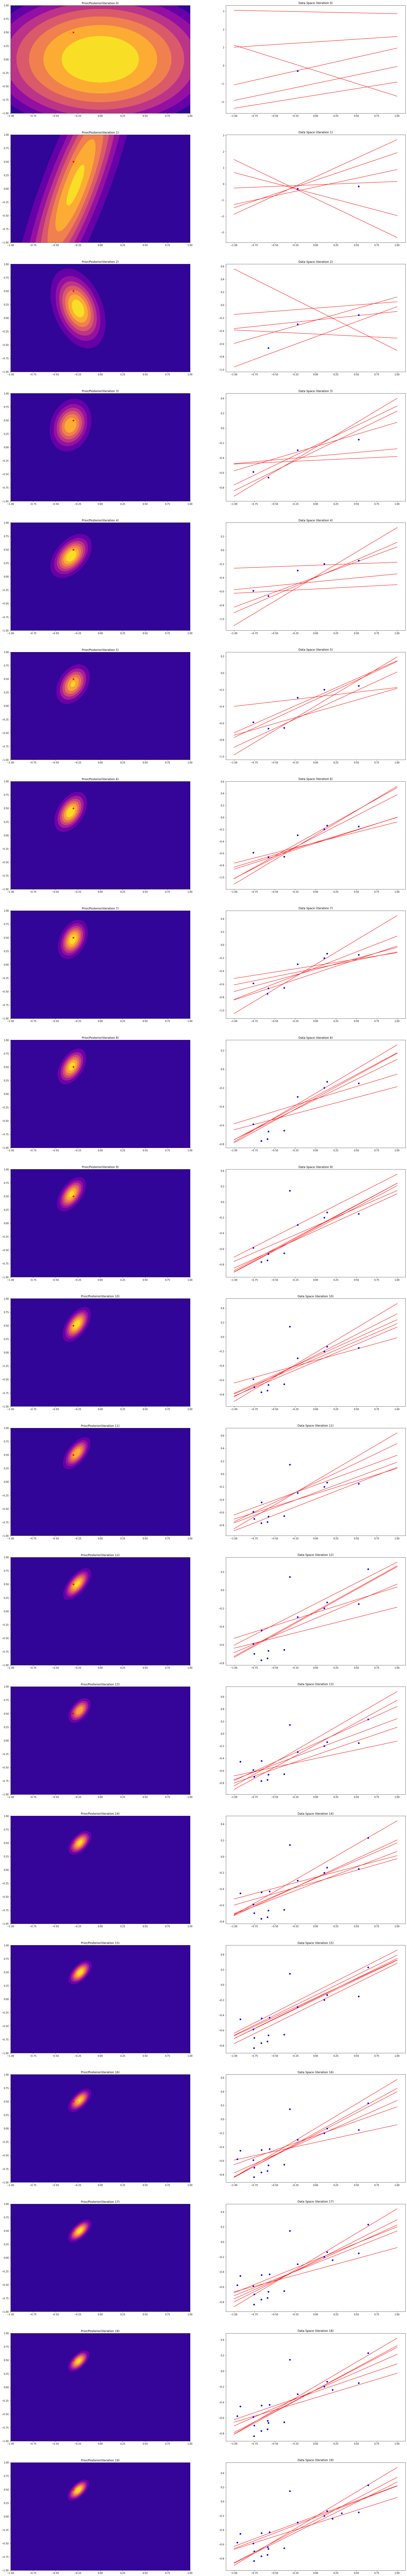

In [10]:
n_samples_data_space = 6
n_samples = 20
x_tot = []
y_tot = []
fig, axs = plt.subplots(n_samples, 2, figsize=(30, 200))

for i in range(0,len(x)):

    x_tot.append(x[i][1])
    y_tot.append(y[i])
    t = np.linspace(-1, 1, 100)
    h = np.linspace(-1, 1, 100)
    w_0, w_1 = np.meshgrid(t, h)
    cov = np.linalg.inv(cov_c)
    z = stats.multivariate_normal(mean_c,cov).pdf(np.dstack((w_0, w_1)))
    samples_data_space = stats.multivariate_normal(mean=mean_c,cov=cov).rvs(n_samples_data_space)
    cov_c, mean_c = learn(x[i],y[i],cov_c,mean_c)
    
    
    axs[i, 0].contourf(t, h, z, cmap='plasma')
    
    axs[i, 0].set_title('Prior/Posterior(iteration {})'.format(i))
    axs[i, 0].scatter(a0,a1, color='red')
   
    ########################
    
    x_data_space = np.linspace(-1, 1, 1000)
    for s in samples_data_space:
        axs[i, 1].plot(x_data_space, s[0]+x_data_space*s[1], linestyle='solid',color='r')
    axs[i, 1].set_title('Data Space (iteration {})'.format(i))
    axs[i, 1].plot(x_tot,y_tot,'bo')
   
 